# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests




In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [3]:
a = 0.7
b = 0.5
b_a = 0.4

In [4]:
ans1 = a+b-(a*b)
ans2 = 1-b_a

### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [5]:
import math
ans1 = 4/52 + 4/52
ans2 = math.factorial(72)/(math.factorial(72-5)*math.factorial(5))

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [7]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    """
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [8]:
# your code here 

p = 4/52+4/52+4/52

1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [10]:
# your code here 
ans1 = probability_of_scoring_k(22,p,8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [14]:
# your code here
k_values = range(23)
p_list = []
for k in k_values:
    p_list.append(probability_of_scoring_k(22,p,k))

1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

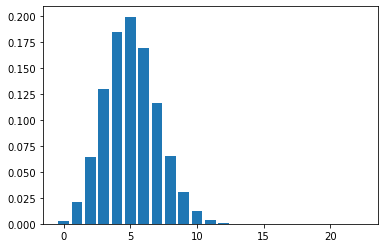

In [35]:
# your code here 
x=range(23)
plt.bar(x,height=p_list,data=p_list)
plt.show()

In [39]:
"It is normally distributed"


'It is normally distributed'

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [84]:
df = pd.read_pickle('data/data10000.pkl')
df1 = pd.read_pickle('data/no_queso.pkl')

In [107]:
pop_mean = 20
sigma = 2
sample_mean= np.mean(df)

def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    return (sample_mean-pop_mean)/((sigma)/np.sqrt(check_amt))

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [108]:
# your code here 
z_score(24)


0.0689927910937579

In [109]:
# your answer here
"Our check was 0.0689927910937579 std.dev above the mean"

'Our check was 0.0689927910937579 std.dev above the mean'

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [111]:
a = 0.05
z_ = z_score(25)

stats.norm.cdf(z_)

0.5280685117469502

In [97]:
# your answer here 
"at z-score of 0.52, z-table shows that sample mean is 70.5% higher than pop_mean"

'at z-score of 0.54, z-table shows that sample mean is 70.5% higher than pop_mean'

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [122]:
# your code here 
conf_interval = 0.95
q = 0.975
z = stats.norm.ppf(q)
sample_size = len(df1)
moe = z * (sigma/math.sqrt(sample_size))
conf = (sample_mean - moe,sample_mean + moe)
print(conf, moe)

(19.904207182557446, 20.152125195479268) 0.1239590064609123


In [124]:
# your written answer here
" The 95% of our true data is contained in between 19.90 and 20.15"

' The 95% of our true data is contained in between 19.90 and 20.15'

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
# Your written answer here


## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

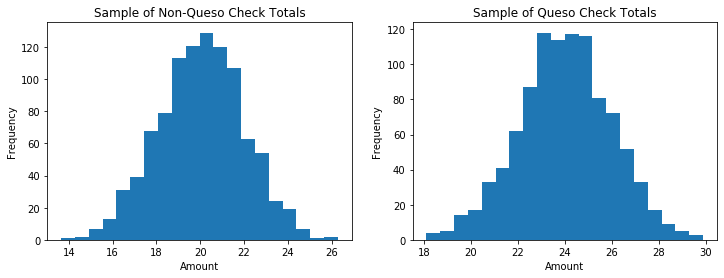

In [113]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [115]:
# Your written answer here
"H0 -> customers who oreder Queso spends the same amount of money as who don't order Queso"
"Ha -> customers who order Queso spend more or less than the customers who don't order Queso"

"Ha -> customers who order Queso spend more or less than the customers who don't order Queso"

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [116]:
# your answer here
" to make type1 error is failing to reject the H0 when there is a difference"
"to make type2 erros is failing to reject H0 even though it's actually false"

"to make type2 erros is failing to reject H0 even though it's actually false"

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [123]:
# your code here 
stats.ttest_ind(no_queso,queso,equal_var=True)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

In [121]:
# your answer here
"P-value is larger than 0.05, so we can not reject the Null. This means, these two samples have no difference"

'P-value is larger than 0.05, so we can not reject the Null. This means, these two samples have no difference'